In [1]:
import numpy as np
import ROOT
import math
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)

Welcome to JupyROOT 6.24/06


In [2]:
from ROOT import TDirectory as gDirectory

In [3]:
file=ROOT.TFile("run2_thresh300_fbfDQC.root")

In [4]:
file = ROOT.TFile.Open("run2_thresh300_fbfDQC.root")
direc = file.Get("QFillByFillAnalyzerDB")
hist = ROOT.TH1D()
hist = direc.Get("qHist1D_sig_22_0")


In [5]:
c = ROOT.TCanvas("c")
hist.Draw()

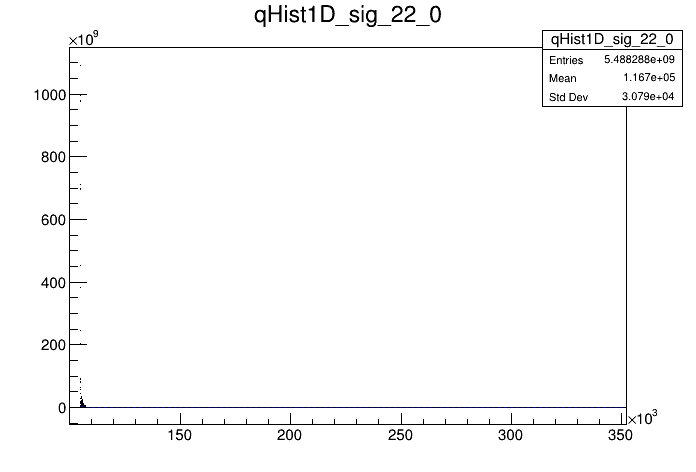

In [6]:
c.Draw()

In [7]:
x_values = 1,2,3,4,5
y_values = 2,4,6,8,10


def objective(x, a, b, c, d, e):
    return a * x + b + c + d + e
    
def objective1(time, norm, life, asym, R, phi):
    return norm *expo(-time/life) * (1 + asym*(cosine(R)*time + phi))

f2=np.vectorize(objective1)

In [9]:
#for ibin in range (0,hist.GetNbinsX()):
 # y_val[ibin]=hist.GetBinContent(ibin)
  #y_err[ibin]=hist.GetBinError(ibin)
  #x_val[ibin]=hist.GetBinCenter(ibin)

In [225]:
y_val[30]

3872.7140629291534

In [226]:
y_err[30]

1301.745223283788

In [227]:
x_val[2099]

131478.5

In [8]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 16), dpi=80)


plt.figure()
plt.plot(x_val,y_val, 'o', color= 'k', linewidth=0.000001, markersize=0.000001)
plt.errorbar(x_val,y_val, yerr= y_err, fmt='o', capsize= 0.001, capthick= 0.001, ecolor='k')
plt.xlim([150000,350000])
plt.ylim([0,3000000000])
plt.show()

NameError: name 'x_val' is not defined

<Figure size 960x1280 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
from BlindersPy3 import Blinders
from BlindersPy3 import FitType


In [10]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [11]:
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = 0.001*getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * exp(-time/life) * (1 + asym*cos(omega*time + phi))

In [12]:
func = ROOT.TF1("func", blinded_wiggle, 30000,300000,5)
func.SetParNames('N','tau','A','R','phi')
func.SetParameters(5060000000,64420,0.23,0.0,2.16)
func.SetLineColor(2)
func.SetNpx(10000000)

In [13]:
rawBinToNs = 1.25
inject_time = 104800
binwidth=hist.GetBinWidth(1)
nbins=hist.GetNbinsX()
binlowedge=hist.GetBinLowEdge(1)
binhighedge=hist.GetBinLowEdge(nbins)+binwidth
hist.SetBins(nbins, rawBinToNs*(binlowedge-inject_time), rawBinToNs*(binhighedge-inject_time));

hist.Rebin(8)


 FCN=59058.7 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         312 TOTAL
                     EDM=7.75578e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            5.28265e+09   3.41349e+05  -1.29535e+01   8.23215e-14
   2  tau          6.44091e+04   2.50335e+00   3.39549e-05   1.82356e-09
   3  A            2.27642e-01   4.56310e-05  -4.66306e-09   8.15121e-05
   4  R           -2.99902e+01   2.57001e+00   1.87815e-06  -2.80414e-09
   5  phi          2.21335e+00   3.94233e-04   3.94233e-04   8.96043e-05


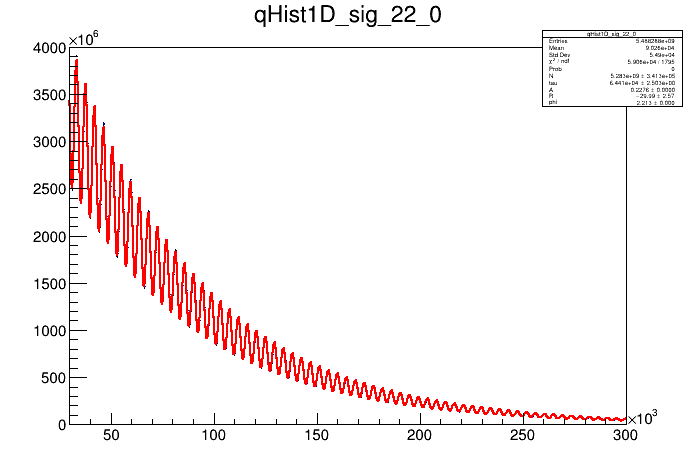

In [21]:
nbins
hist.GetYaxis().SetRangeUser(0,4000000000)
hist.GetXaxis().SetRangeUser(30000,300000)
ROOT.gStyle.SetOptFit(1111)
hist.Draw()
hist.Fit('func','RE','',30000,300000)
#func.Draw()
c.Draw()

In [19]:
def fit_wiggle(
    time: float,
    norm: float = 1.0,
    life: float = 1.0,
    asym: float = 0.0,
    R:    float = 0.0,
    phi:  float = 0.0) -> float:

    omega = getBlinded.paramToFreq(R)/1000.
#    omega = myBlinder.paramToFreq(R) unblind version
    
    fit_val=norm * exp(-time/life) * (1 + asym*cos(omega*time + phi))
    
    return fit_val

In [15]:
norm0  = 5.28265e+09
life0  = 6.44091e+04
asym0  = 2.27642e-01
R0     = 0.0
phi0   = 2.21335e+00
#norm0  = 5.30000e+09
#life0  = 6.40000e+04
#asym0  = 2.3e-01
#R0     = 0.0
#phi0   = 2.20000e+00
init_params=(norm0,life0,asym0,R0,phi0)
print("initial paramteres value:\n",init_params)

initial paramteres value:
 (5282650000.0, 64409.1, 0.227642, 0.0, 2.21335)


In [16]:
y_val=np.empty(hist.GetNbinsX())
y_err=np.empty(hist.GetNbinsX())
x_val=np.empty(hist.GetNbinsX())
for ibin in range (0,hist.GetNbinsX()):
  y_val[ibin]=hist.GetBinContent(ibin)
  y_err[ibin]=hist.GetBinError(ibin)
  x_val[ibin]=hist.GetBinCenter(ibin)

/home/ritwika/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/home/ritwika/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


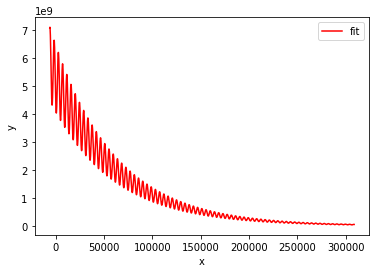

In [20]:
import scipy.optimize as opt
f3=np.vectorize(fit_wiggle)
results,_=opt.curve_fit(fit_wiggle, x_val, y_val, p0=init_params, sigma=y_err)
#results5,_=opt.curve_fit(fit_wiggle,x_val,y_val,p0=init_params,sigma=y_err)
#fit_wiggle(init_params)
#y=objective1(10, 5.28265e+09, 6.44091e+04, 2.27642e-01, 0.0, 2.21335e+00)
#results
plt.plot(x_val, fit_wiggle(x_val, *results), 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [24]:
len(y_val)

2100

In [25]:
len(y_err)

2100

In [26]:
hist.GetNbinsX()

2100

In [27]:
len(x_val)

2100

In [29]:
popt, _ = opt.curve_fit(objective, x_values, y_values)

/home/ritwika/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [30]:
popt

array([ 2.00000000e+00, -2.18070006e-12,  1.00000000e+00])

In [31]:
_

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [35]:
results

array([-7.43649281e+04,  1.57624794e+10,  1.00000000e+00])